 # 📊 Task 4: Predicting Insurance Claim Amounts

# ------------------------------------------------------


 # ✅ STEP 1: Import Required Libraries

In [34]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error


# ✅ STEP 2: Load the Dataset
# You can download this dataset from Kaggle: https://www.kaggle.com/datasets/mirichoi0218/insurance


In [26]:
insurance = pd.read_csv("insurance.csv") 

# ✅ STEP 3: Basic Information About the Data

In [27]:
print("First 5 rows of the dataset:")
display(insurance.head())

print("\nDataset Info:")
print(insurance.info())

print("\nBasic Statistics:")
display(insurance.describe())



First 5 rows of the dataset:


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None

Basic Statistics:


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# ✅ STEP 4: Check for Missing Values

In [28]:
print("\nMissing values in each column:")
print(insurance.isnull().sum())


Missing values in each column:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


# ✅ STEP 5: Encode Categorical columns to Numbers

In [29]:
insurance['sex'] = insurance['sex'].map({'female': 0, 'male': 1})
insurance['smoker'] = insurance['smoker'].map({'no': 0, 'yes': 1})
insurance['region'] = insurance['region'].map({
    'southwest': 1,
    'southeast': 2,
    'northwest': 3,
    'northeast': 4
})

print("\nData after converting text to numbers:")
display(insurance.head())


Data after converting text to numbers:


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520


# ✅ STEP 6: Explore Relationships Using Visualizations


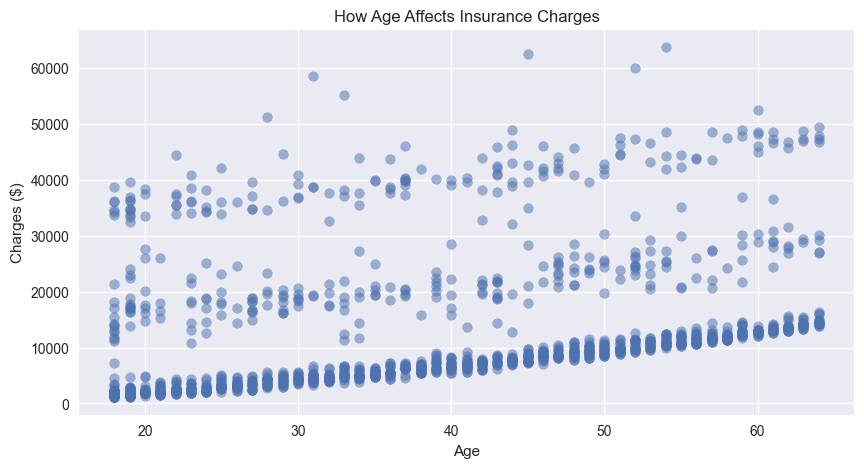

📝 Plot 1 Summary: Older people generally pay higher charges due to increased health risks.


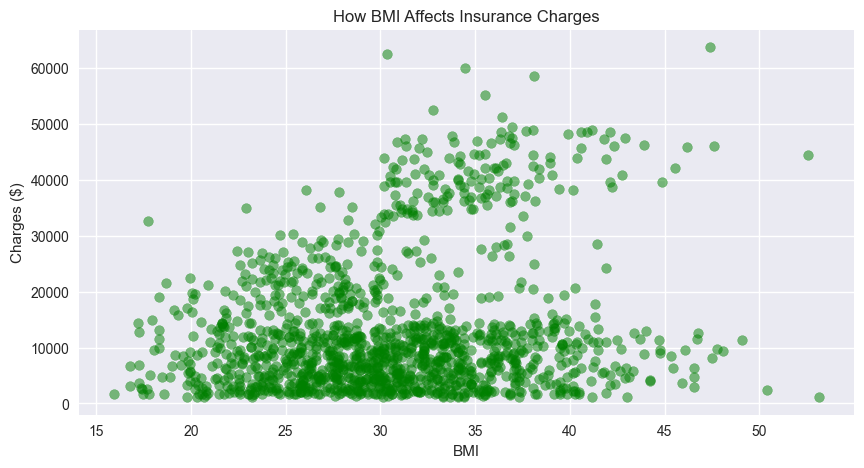

📝 Plot 2 Summary: Higher BMI may lead to obesity-related diseases, increasing insurance cost.


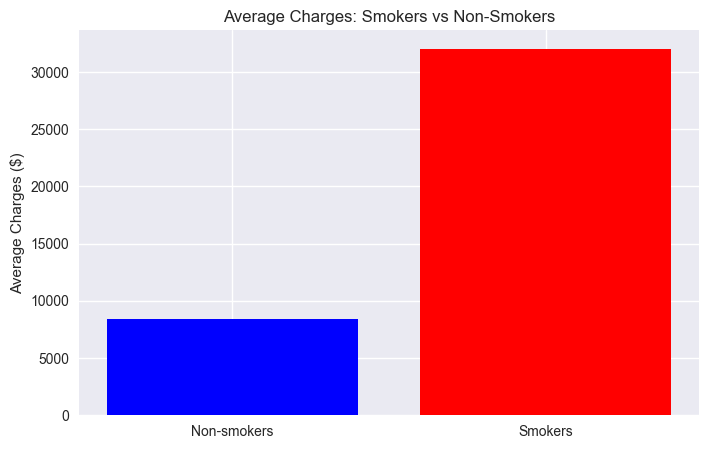

📝 Plot 3 Summary: Smoking greatly increases insurance cost.


In [ ]:

# 📌 Plot 1: Age vs Charges (Scatter Plot)
plt.figure(figsize=(10,5))
plt.scatter(insurance['age'], insurance['charges'], alpha=0.5)
plt.title("How Age Affects Insurance Charges")
plt.xlabel("Age")
plt.ylabel("Charges ($)")
plt.show()
print("📝 Plot 1 Summary: Older people generally pay higher charges due to increased health risks.")

# 📌 Plot 2: BMI vs Charges (Scatter Plot)
plt.figure(figsize=(10,5))
plt.scatter(insurance['bmi'], insurance['charges'], alpha=0.5, color='green')
plt.title("How BMI Affects Insurance Charges")
plt.xlabel("BMI")
plt.ylabel("Charges ($)")
plt.show()
print("📝 Plot 2 Summary: Higher BMI may lead to obesity-related diseases, increasing insurance cost.")

# 📌 Plot 3: Average Charges by Smoking Status (Bar Plot)
plt.figure(figsize=(8,5))
plt.bar(['Non-smokers', 'Smokers'],
        [insurance[insurance['smoker']==0]['charges'].mean(),
         insurance[insurance['smoker']==1]['charges'].mean()],
        color=['blue', 'red'])
plt.title("Average Charges: Smokers vs Non-Smokers")
plt.ylabel("Average Charges ($)")
plt.show()
print("📝 Plot 3 Summary: Smoking greatly increases insurance cost.")

# ✅ STEP 7: Show Correlation Heatmap


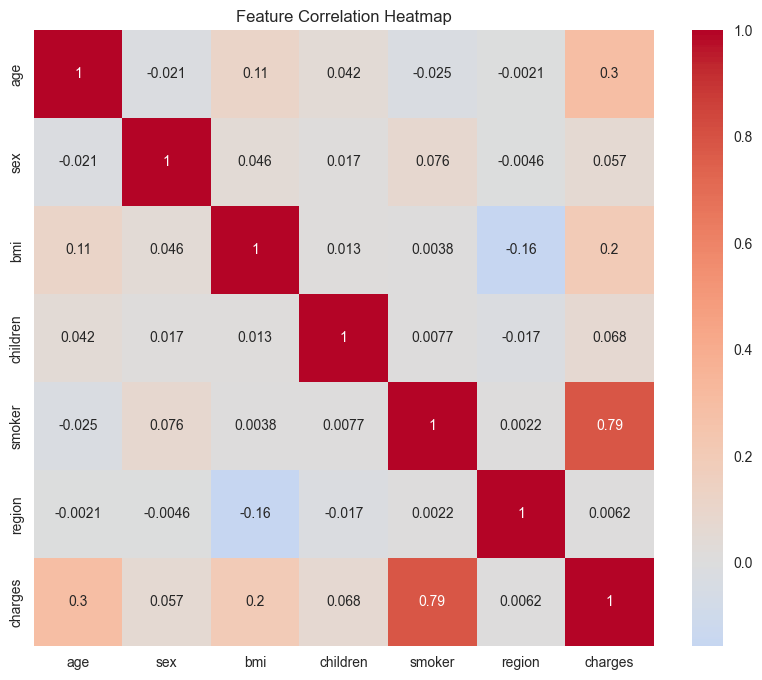

In [ ]:

import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(insurance.corr(), annot=True, cmap='coolwarm', center=0)
plt.title("Feature Correlation Heatmap")
plt.show()


# ✅ STEP 8: Prepare Data for Machine Learning


In [37]:
X = insurance.drop('charges', axis=1)
y = insurance['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training Set Size: {len(X_train)} samples")
print(f"Testing Set Size: {len(X_test)} samples")

Training Set Size: 1070 samples
Testing Set Size: 268 samples



# ✅ STEP 9: Train the Linear Regression Model


In [38]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

# ✅ STEP 10: Make Predictions and Evaluate


In [ ]:

from sklearn.metrics import mean_absolute_error, mean_squared_error

predictions = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))

print(f"\n📉 MAE (Mean Absolute Error): ${mae:.2f}")
print(f"📉 RMSE (Root Mean Squared Error): ${rmse:.2f}")

# Compare actual vs predicted
print("\nFirst 5 Actual vs Predicted Values:")
for i in range(5):
    print(f"Actual: ${y_test.iloc[i]:.2f} | Predicted: ${predictions[i]:.2f}")



📉 MAE (Mean Absolute Error): $4186.51
📉 RMSE (Root Mean Squared Error): $5799.59

First 5 Actual vs Predicted Values:
Actual: $9095.07 | Predicted: $8924.41
Actual: $5272.18 | Predicted: $7116.30
Actual: $29330.98 | Predicted: $36909.01
Actual: $9301.89 | Predicted: $9507.87
Actual: $33750.29 | Predicted: $27013.35


# ✅ STEP 11: Visualize Prediction Accuracy



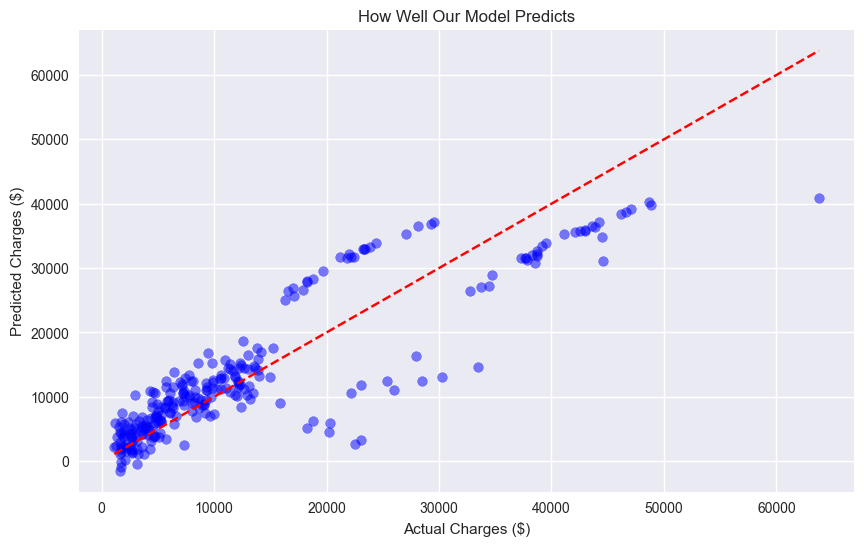

In [47]:
# 📌 Plot 4: Actual vs Predicted Charges (Scatter Plot)
plt.figure(figsize=(10,6))
plt.scatter(y_test, predictions, alpha=0.5, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Charges ($)")
plt.ylabel("Predicted Charges ($)")
plt.title("How Well Our Model Predicts")
plt.show()


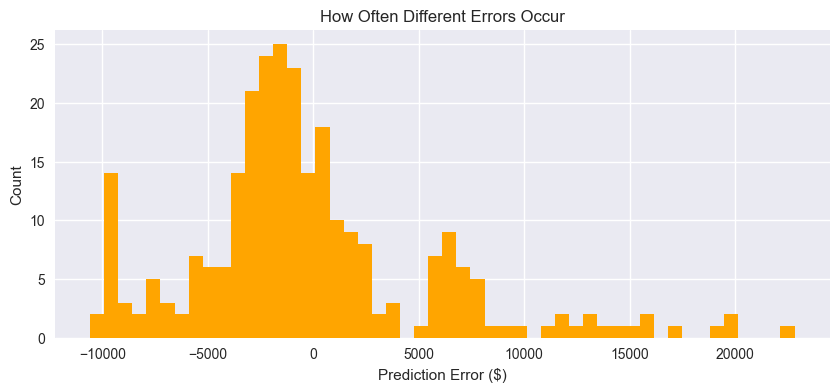

In [48]:
# 📌 Plot 5: Distribution of Errors (Histogram)
errors = y_test - predictions
plt.figure(figsize=(10,4))
plt.hist(errors, bins=50, color='orange')
plt.xlabel("Prediction Error ($)")
plt.ylabel("Count")
plt.title("How Often Different Errors Occur")
plt.show()

# ✅ STEP 12: Feature Importance



Feature Importance:
age: 257.06
sex: -18.79
bmi: 335.78
children: 425.09
smoker: 23647.82
region: 271.28

Base charge (intercept): $-13031.74


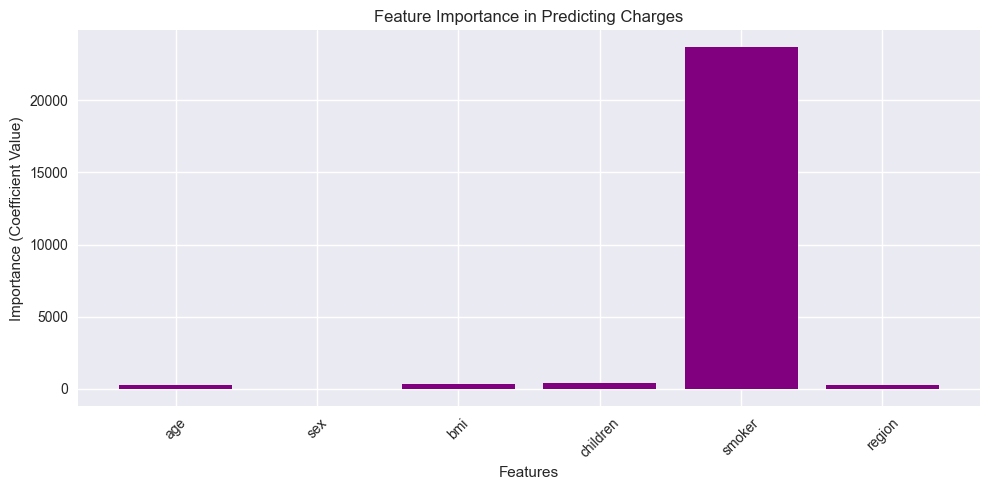

In [50]:
print("\nFeature Importance:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.2f}")

print(f"\nBase charge (intercept): ${model.intercept_:.2f}")


# 📊 Plot 6: Feature Importance (Bar Chart)
plt.figure(figsize=(10,5))
plt.bar(X.columns, model.coef_, color='purple')
plt.xlabel("Features")
plt.ylabel("Importance (Coefficient Value)")
plt.title("Feature Importance in Predicting Charges")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [53]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, predictions)
print(f"✅ R² Score (Accuracy): {r2:.4f}")


✅ R² Score (Accuracy): 0.7833


# ✅ STEP 13: Real-World Prediction Example



In [52]:
# ✅ STEP 13: Real-World Prediction Example
new_customer = {
    'age': 35,
    'sex': 1,
    'bmi': 28.5,
    'children': 2,
    'smoker': 1,
    'region': 3
}

new_customer_df = pd.DataFrame([new_customer])
predicted_charge = model.predict(new_customer_df)

print("\n Real-World Prediction:")
print("A 35-year-old male, smoker, BMI 28.5, with 2 kids, living in Northwest:")
print(f"Estimated Insurance Charges: ${predicted_charge[0]:.2f}")

# Comparison with average charges
print("\n Comparison with Averages:")
print(f"Overall average: ${y.mean():.2f}")
print(f"Smokers average: ${insurance[insurance['smoker']==1]['charges'].mean():.2f}")
print(f"Non-smokers average: ${insurance[insurance['smoker']==0]['charges'].mean():.2f}")



 Real-World Prediction:
A 35-year-old male, smoker, BMI 28.5, with 2 kids, living in Northwest:
Estimated Insurance Charges: $30828.06

 Comparison with Averages:
Overall average: $13270.42
Smokers average: $32050.23
Non-smokers average: $8434.27
